# GMTNIRS Lband 3-3 facet shadowing

The GMTNIRSgroove facets get shadowed for certain incidence angles.  The shadowing shrinks the beam waist, which then broadens the blaze envelope.  Here we compute the effective size of the facet as a function of input angle.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'

### Fixed physical properties

In [8]:
sigma = 71.43 # micron, groove spacing, used to calculate diffraction order location

In [65]:
groove_top_width = sigma - 42.43 # micron pitch - groove width is 

REFERENCE: Here is a cartoon of the IGRINS CA-1 grating from [this slideshow](https://speakerdeck.com/gully/ideas-for-metrology-of-silicon-diffractive-optics?slide=45).

In [10]:
%%html
<img src="../IGRINS_CA1_schematic.png" width=300></img>

The angle $a$ is the fixed $70.53^\circ$ from the Si crystal planes, $b$ is $\arctan{3}$, and c is whatever is left over to add up to 180.

In [11]:
a_degrees = 70.53 # "Fixed" Si crystal plane angle

In [12]:
b_degrees = 76.0 # Blaze angle in degrees

In [13]:
c_degrees = 180 - a_degrees - b_degrees # Complement must add up to 180

In [14]:
a_radians, b_radians, c_radians = (np.radians(angle) for angle in 
                                   [a_degrees, b_degrees, c_degrees])

#### What are the lengths of line segments $A$, $B$, $C$?

$A$ is the groove spacing minus the groove top:

In [15]:
A_micron = sigma - groove_top_width

We now have a triangle with known Angle-Side-Angle or `ASA`.
Solve for line segments $B$ and $C$ with the [Law of Sines](https://en.wikipedia.org/wiki/Law_of_sines): 
$$\frac{\sin{\alpha}}{a} \,=\, \frac{\sin{\beta}}{b} \,=\, \frac{\sin{\gamma}}{c}$$

In [16]:
fixed_ratio = np.sin(a_radians) / A_micron

In [17]:
B_micron = np.sin(b_radians) / fixed_ratio
C_micron = np.sin(c_radians) / fixed_ratio

In [18]:
A_micron, B_micron, C_micron

(42.43, 43.66667667208741, 24.819427842379547)

## Determine the coordinates of the triangle vertices

The coordinates are needed for plotting purposes.  Define the `c` vertex at the origin.  The vectors will have coordinates $$\vec{a} = a_x \hat{i} + a_y \hat{j} = (a_x, a_y)$$

In [19]:
c_vertex = np.array([0.0, 0.0])
c_vertex.shape

(2,)

In [20]:
b_vertex = c_vertex + np.array([B_micron, 0.0])

The $a$ vertex has components derived from the angles and side lengths. **SOH-CAH-TOA**

$$\sin{c} = -a_y/B$$
$$\cos{c} = a_x/B$$

In [21]:
a_vertex = np.array([B_micron*np.cos(c_radians), -B_micron*np.sin(c_radians)])
a_vertex

array([ 36.42563697, -24.08218476])

Finally we will define another vector $d$ as the start of the groove top:

In [22]:
d_vertex = np.array([-groove_top_width, 0.0])

### Illustrate the beam

The beam comes in at a certain incidence angle and illuminates all of the groove top and some of the groove facet, dependening on the angle.

In [23]:
incidence_angle_degrees = 68.6
incidence_angle_radians = np.radians(incidence_angle_degrees)

Determine the coordinates of the beam.  The rays come in from infinity, but let's draw them has having a fixed length for illustration purposes.

In [24]:
far = 100.0

In [25]:
ray1_vertex = np.array([-far*np.sin(incidence_angle_radians), 
                                far*np.cos(incidence_angle_radians)])

Determine the coordinate at which the marginal ray is shadowed:

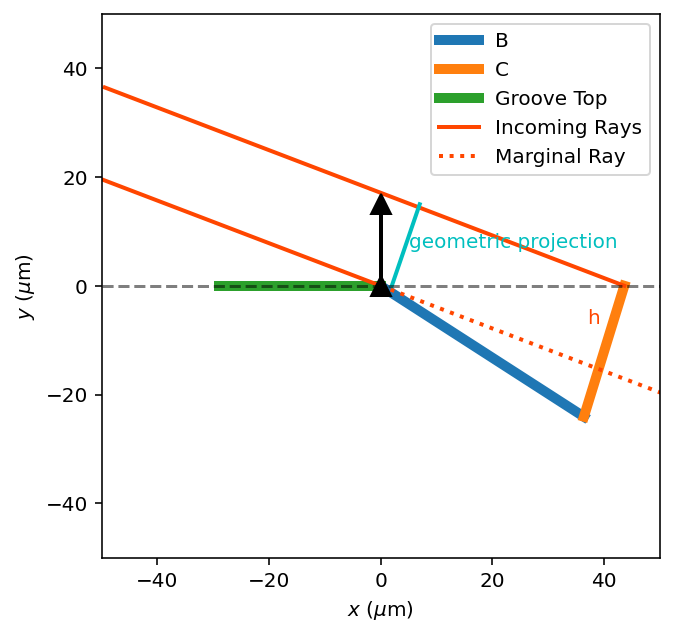

In [64]:
plt.figure(figsize=(5, 5))
plt.plot([c_vertex[0], a_vertex[0]], [c_vertex[1], a_vertex[1]], lw=5, label='B')
plt.plot([a_vertex[0], b_vertex[0]], [a_vertex[1], b_vertex[1]], lw=5, label='C')
plt.plot([c_vertex[0], d_vertex[0]], [c_vertex[1], d_vertex[1]], lw=5, label='Groove Top')

# Plot the incoming rays
plt.plot([c_vertex[0], ray1_vertex[0]], [c_vertex[1], ray1_vertex[1]], 
         color='#ff4600', lw=2, label='Incoming Rays')
plt.plot([c_vertex[0]+B_micron, ray1_vertex[0]+B_micron], [c_vertex[1], ray1_vertex[1]], 
         color='#ff4600', lw=2)
plt.plot([c_vertex[0], -ray1_vertex[0]], [c_vertex[1], -ray1_vertex[1]], 
         color='#ff4600', lw=2, linestyle='dotted', label='Marginal Ray')

# plt.text(B_micron/2, 1, 'A')
# plt.text(b_vertex[0]-2, b_vertex[1]-2, r'$\beta$')
# plt.text(2,-1, r'$\gamma$')
plt.text(37,-7, 'h', color ='#ff4600')
plt.text(5,+7, r'geometric projection', color ='c')


plt.plot([0.0, 0.0], [0.0, 15], linewidth=2, color='k', marker='^', markersize=10)
plt.plot([2.0, 7.0], [0.0, 15], linewidth=2, color='c')

plt.axhline(0.0, linestyle='dashed', color='k', alpha=0.5)

plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('$x$ ($\mu$m)');
plt.ylabel('$y$ ($\mu$m)')
plt.legend();

We have $\gamma$, and $\beta$, so we can get $\alpha$:

In [30]:
gamma_degrees = 90 - incidence_angle_degrees
gamma_radians = np.radians(gamma_degrees)

In [31]:
phi_degrees = 180 - b_degrees - gamma_degrees
phi_radians = np.radians(phi_degrees)

We want to find the length of the linesegment.  Let's use angle-side-angle `ASA`:

$$\frac{\sin{\phi}}{A} \,=\, \frac{\sin{\beta}}{b} \,=\, \frac{\sin{\gamma}}{C}$$

solve for $C$:

$$C \,=\, A \frac{\sin{\gamma}}{\sin{\phi}}$$


In [32]:
h_micron = A_micron * np.sin(gamma_radians)/np.sin(phi_radians)

In [36]:
h_micron#/C_micron

15.6117496875083

Yay! We did it!